In [1]:
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Define the paths to the training images for each class
class_paths = {
    'glioma': '../Images/Training/glioma/',
    'meningioma': '../Images/Training/meningioma/',
    'notumor': '../Images/Training/notumor/',
    'pituitary': '../Images/Training/pituitary/'
}


In [3]:
def find_closest_class(mean_pixel_value):
    closest_class = None
    closest_distance = float('inf')

    # Compare the mean pixel value with the average pixel values of each class
    for class_name, average in class_averages.items():
        distance = np.linalg.norm(mean_pixel_value - average)
        if distance < closest_distance:
            closest_distance = distance
            closest_class = class_name

    return closest_class


In [4]:
# Calculate the average pixel value for each class
class_averages = {}
for class_name, path in class_paths.items():
    image_files = os.listdir(path)
    pixel_sum = np.zeros((1, 3))
    num_images = len(image_files)

    # Calculate the sum of pixel values for each image
    for image_file in image_files:
        image_path = os.path.join(path, image_file)
        image = cv2.imread(image_path)
        pixel_sum += np.sum(image, axis=(0, 1))

    # Calculate the average pixel value for the class
    class_averages[class_name] = pixel_sum / (num_images * image.shape[0] * image.shape[1])


In [5]:
# Path to the test image folder
test_folder_path = '../Images/Testing/'

# Load and classify each test image
correct_classifications = 0
total_images = 0

for class_name in class_paths.keys():
    class_folder_path = os.path.join(test_folder_path, class_name)
    image_files = os.listdir(class_folder_path)

    for image_file in image_files:
        image_path = os.path.join(class_folder_path, image_file)
        test_image = cv2.imread(image_path)
        mean_pixel_value = np.mean(test_image, axis=(0, 1))

        # Find the closest class for the test image
        closest_class = find_closest_class(mean_pixel_value)
        
        # Check if the closest class matches the actual class
        if closest_class == class_name:
            correct_classifications += 1
        
        total_images += 1


In [6]:
accuracy = correct_classifications / total_images * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 36.46%


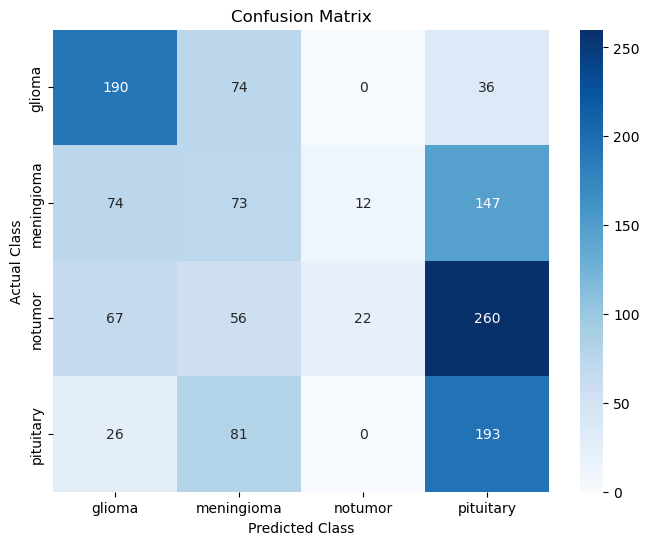

In [7]:
# Load and classify each test image
actual_classes = []
predicted_classes = []

for class_name in class_paths.keys():
    class_folder_path = os.path.join(test_folder_path, class_name)
    image_files = os.listdir(class_folder_path)

    for image_file in image_files:
        image_path = os.path.join(class_folder_path, image_file)
        test_image = cv2.imread(image_path)
        mean_pixel_value = np.mean(test_image, axis=(0, 1))

        # Find the closest class for the test image
        closest_class = find_closest_class(mean_pixel_value)

        actual_classes.append(class_name)
        predicted_classes.append(closest_class)

# Create confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes, labels=list(class_paths.keys()))

# Visualize confusion matrix
class_names = list(class_paths.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

In [8]:
precision = precision_score(actual_classes, predicted_classes, average='weighted')
recall = recall_score(actual_classes, predicted_classes, average='weighted')
f1 = f1_score(actual_classes, predicted_classes, average='weighted')

# Create a DataFrame
data = {'Accuracy':[accuracy],'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]}
df = pd.DataFrame(data, index=['baseline'])

# Display the DataFrame
print(df)

           Accuracy  Precision    Recall  F1 Score
baseline  36.460717   0.451118  0.364607  0.315445
